In [1]:
import numpy as np
import time

# Pure Python version of the particle simulator
class Particle:
    def __init__(self, x, y, vx, vy):
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy

class ParticleSimulator:
    def __init__(self, particles):
        self.particles = particles

    def evolve(self, dt):
        timestep = 0.00001
        nsteps = int(dt/timestep)
        
        for i in range(nsteps):
            for p in self.particles:
                # Update positions
                p.x += p.vx * timestep
                p.y += p.vy * timestep

# NumPy version of the particle simulator
class ParticleSimulatorNP:
    def __init__(self, particle_positions, particle_velocities):
        self.particle_positions = particle_positions
        self.particle_velocities = particle_velocities

    def evolve(self, dt):
        timestep = 0.00001
        nsteps = int(dt/timestep)
        
        for _ in range(nsteps):
            # Update positions
            self.particle_positions += self.particle_velocities * timestep

# Function to generate particles
def generate_particles(n):
    particles = [Particle(x=1.0, y=1.0, vx=0.1, vy=0.1) for _ in range(n)]
    return particles

# Function to generate NumPy particles
def generate_numpy_particles(n):
    positions = np.ones((n, 2))
    velocities = np.full((n, 2), 0.1)
    return positions, velocities

# Particle counts to test
particle_counts = [10, 100, 1000, 10000]
python_times = []
numpy_times = []

for n in particle_counts:
    # Pure Python simulation
    particles = generate_particles(n)
    simulator = ParticleSimulator(particles)
    start_time = time.time()
    simulator.evolve(0.1)
    python_times.append(time.time() - start_time)
    
    # NumPy simulation
    positions, velocities = generate_numpy_particles(n)
    simulator_np = ParticleSimulatorNP(positions, velocities)
    start_time = time.time()
    simulator_np.evolve(0.1)
    numpy_times.append(time.time() - start_time)

python_times, numpy_times


([0.0073032379150390625,
  0.08145427703857422,
  1.084247350692749,
  10.933139085769653],
 [0.011355876922607422,
  0.019987821578979492,
  0.031548261642456055,
  0.10251760482788086])

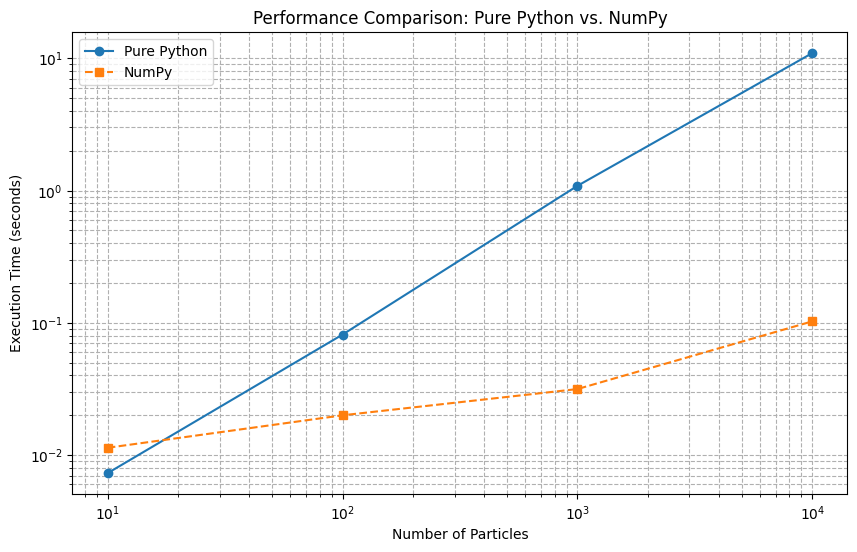

In [2]:
import matplotlib.pyplot as plt

# Plotting the performance comparison
plt.figure(figsize=(10, 6))
plt.plot(particle_counts, python_times, marker='o', linestyle='-', label='Pure Python')
plt.plot(particle_counts, numpy_times, marker='s', linestyle='--', label='NumPy')

plt.xlabel('Number of Particles')
plt.ylabel('Execution Time (seconds)')
plt.xscale('log')
plt.yscale('log')
plt.title('Performance Comparison: Pure Python vs. NumPy')
plt.legend()
plt.grid(True, which="both", ls="--")

plt.show()
